# Housing property sell price prediction

### Data Import & primary checks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_raw = pd.read_csv("train.csv")

In [3]:
train_raw.head() #First check of data for available columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_raw.info() #First check of data for columns type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Removing features more than 90% null values directly. "PoolQC", "Alley", "MiscFeature"**

In [5]:
train1 = train_raw.drop(["PoolQC", "Alley", "MiscFeature", "Id", "3SsnPorch"], axis=1)

**Conversion to Strings for columns 'MSSubClass','OverallQual','OverallCond', 'MoSold'**

In [6]:
train1['MSSubClass'] = train1['MSSubClass'].map({ 20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [7]:
for i in ['OverallQual', 'OverallCond']:
    train1[i] = train1[i].map({10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [8]:
train1['MoSold'] = train1['MoSold'].map({
                               1:'Jan',
                               2:'Feb', 
                               3:'Mar',
                               4:'Apr',
                               5:'May', 
                               6:'June',
                               7:'July',
                               8:'Aug', 
                               9:'Sep',
                               10:'Oct',
                               11:'Nov', 
                               12:'Dec'})

**Further Conversion to Strings for columns 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'BsmtHalfBath','HalfBath', 'GarageCars', 
'Fireplaces', 'TotRmsAbvGrd','BedroomAbvGr'**

In [9]:
for i in ['BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'BsmtHalfBath','HalfBath', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd','BedroomAbvGr']:
    train1[i] = train1[i].map({0:'NotAvail', 
                               1:'Qty_1',
                               2:'Qty_2', 
                               3:'Qty_3',
                               4:'Qty_4',
                               5:'Qty_5', 
                               6:'Qty_6',
                               7:'Qty_7',
                               8:'Qty_8', 
                               9:'Qty_9',
                               10:'Qty_10',
                               11:'Qty_11', 
                               12:'Qty_12',
                               13:'Qty_13',
                               14:'Qty_14'})

In [10]:
train1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,Feb,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,May,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,Sep,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,NaN,0,Feb,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,Dec,2008,WD,Normal,250000


**Creating column whether property has been remodelled or no --> *Derived Metrics***

In [11]:
train1['Remodld_Yes'] = train1.apply(lambda x: 1 if x['YearRemodAdd'] != x['YearBuilt'] else 0, axis = 1)

**Counting the age of property with respect to sell date(*Year Sold - Year Built*) --> *Derived Metrics***

In [12]:
train1['ageofhouse'] = train1['YrSold'] - train1['YearBuilt']
#Year data is not required as above metrics are derived from that information
train1 = train1.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)

**Separating numerical columns & creating List**

In [13]:
lis_num = list(train1.select_dtypes(exclude='object'))
lis_num

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'Remodld_Yes',
 'ageofhouse']

### Checking statistical metrics with Univariate analysis

LotFrontage


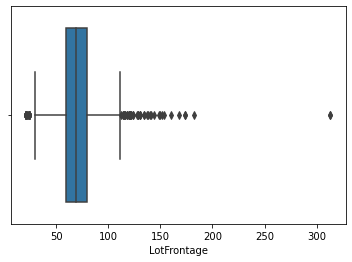

LotArea


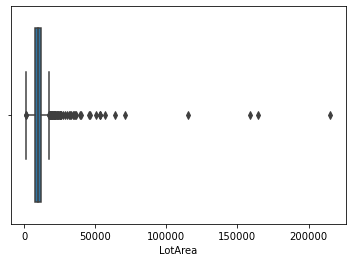

MasVnrArea


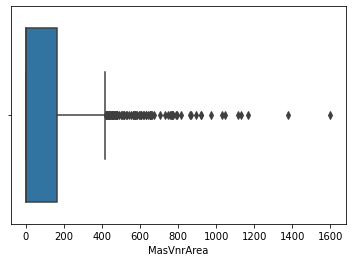

BsmtFinSF1


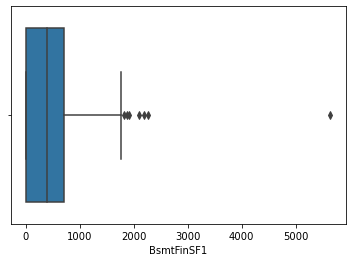

BsmtFinSF2


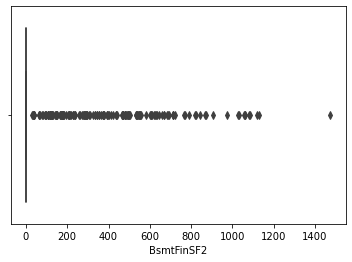

BsmtUnfSF


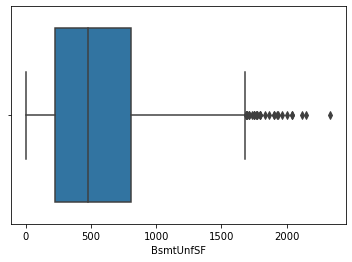

TotalBsmtSF


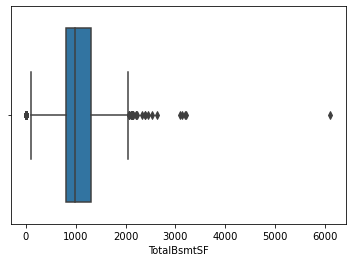

1stFlrSF


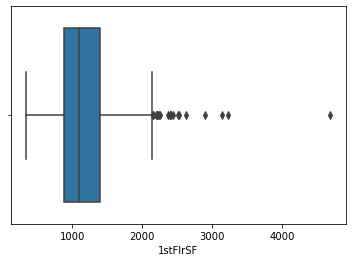

2ndFlrSF


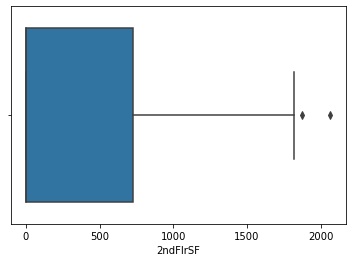

LowQualFinSF


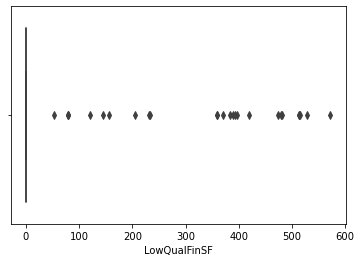

GrLivArea


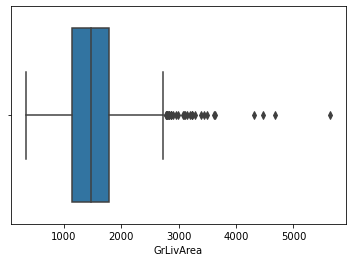

GarageYrBlt


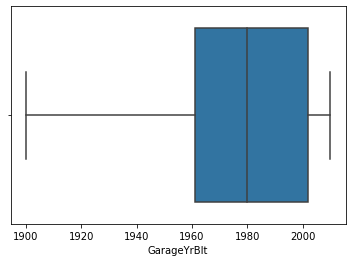

GarageArea


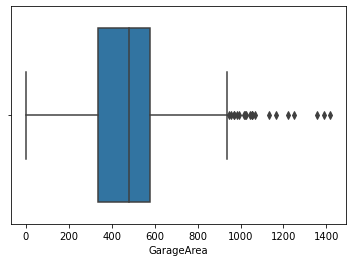

WoodDeckSF


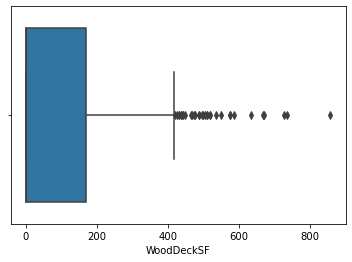

OpenPorchSF


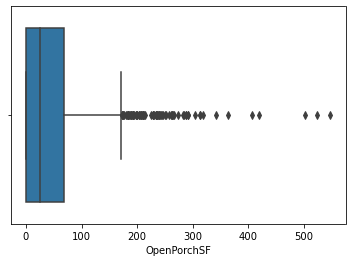

EnclosedPorch


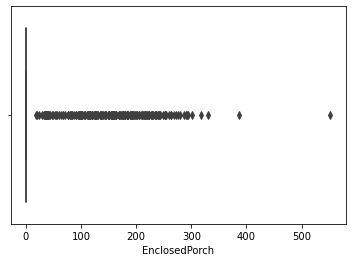

ScreenPorch


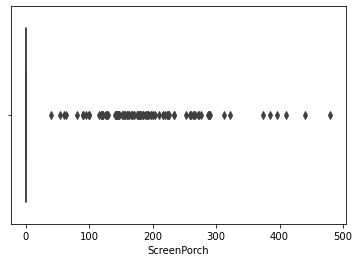

PoolArea


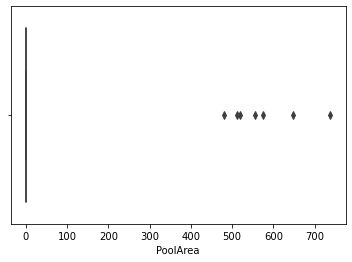

MiscVal


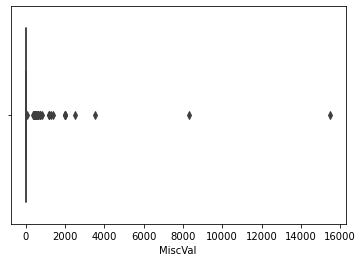

SalePrice


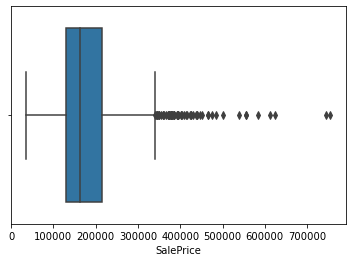

Remodld_Yes


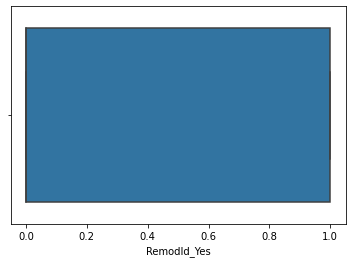

ageofhouse


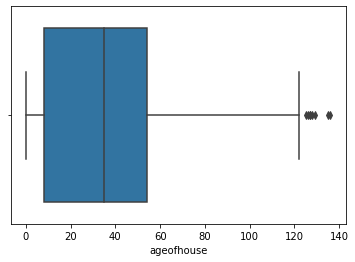

In [14]:
for i in lis_num:
    sns.boxplot(train1[i])
    print(i)
    plt.show()

**LowQualFinSF, KitchenAbvGr, PoolArea, MiscVal** are having bised data, and shall be removed.

In [15]:
train2 = train1.drop(["LowQualFinSF", "PoolArea", "MiscVal", 'GarageYrBlt'], axis=1)
lis_rmvd = ["LowQualFinSF", "PoolArea", "MiscVal", 'GarageYrBlt']

lis2_num = set(lis_num)-set(lis_rmvd) #Creating updated list for numerical columns

### Missing value imputation 

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

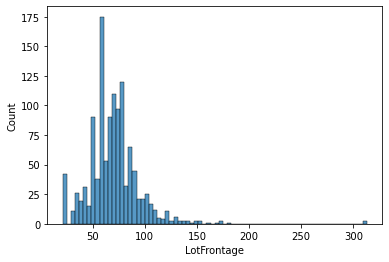

In [16]:
sns.histplot(train2["LotFrontage"]) #Check for data distribution in Lot Front area  with plot

In [17]:
train2.LotFrontage.describe() #Check for missing values

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
train2['LotFrontage'] = train2['LotFrontage'].fillna(69.0) #Imputing missing values with Median as distribution is skewed

In [19]:
train2.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

Missing value imputation for **MasVnrType**

In [20]:
train2.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [21]:
train2.MasVnrArea.isnull().sum()

8

In [22]:
train2["MasVnrType"] = train2['MasVnrType'].fillna("None")
train2["MasVnrArea"] = train2['MasVnrArea'].fillna(0.0)

In [23]:
train2.BsmtCond.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: BsmtCond
Non-Null Count  Dtype 
--------------  ----- 
1423 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


In [24]:
train2["BsmtFinSF2"].value_counts()

0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

 Checking values counts in **Electrical** if any missing or incorrect data

In [25]:
train2.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### Imputing values for Null or NA as 'NotAvail'. The 'NotAvail' data will be further considered as base/reference while creating dummy variable. Instead of drop first, 'NotAvail' will be dropped.

In [26]:
lis_cat_NotAvail = ["GarageType","GarageFinish","GarageQual","GarageCond", "Fence", "FireplaceQu", "BsmtQual", "BsmtCond", 
                    "BsmtFinType2", "BsmtFinType1", "BsmtExposure"]#Creating list of categorical columns with NotAvail entry

In [27]:
train2.fillna({"GarageType": "NotAvail","GarageFinish": "NotAvail","GarageQual": "NotAvail",
               "GarageCond": "NotAvail", "Fence":"NotAvail", "FireplaceQu":"NotAvail", "Electrical":"SBrkr", 
               "BsmtQual":"NotAvail", "BsmtCond":"NotAvail", "BsmtFinType2":"NotAvail", "BsmtFinSF1":"NotAvail", 
               "BsmtFinType1":"NotAvail", "BsmtExposure":"NotAvail"},inplace=True)

In [28]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### All columns are filled i.e. no missing values are there in data, checking box plots once again

BsmtUnfSF


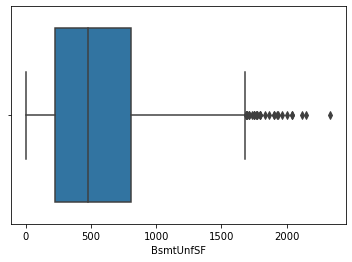

TotalBsmtSF


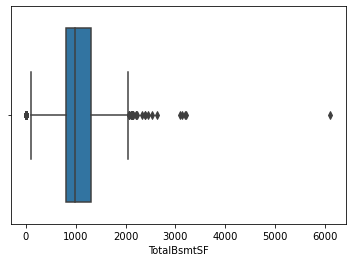

SalePrice


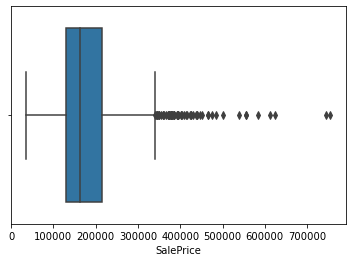

GarageArea


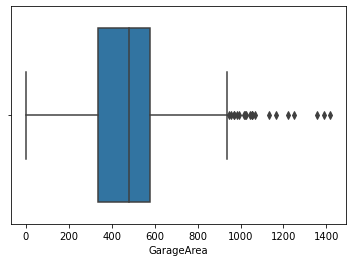

OpenPorchSF


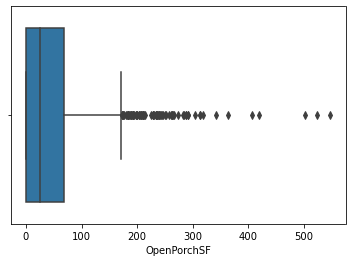

ScreenPorch


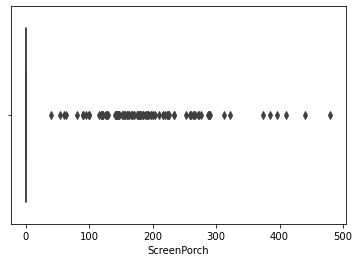

BsmtFinSF1


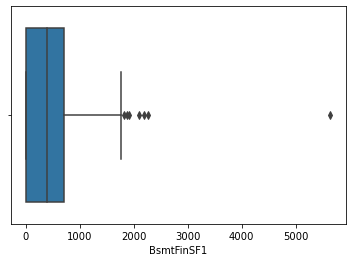

BsmtFinSF2


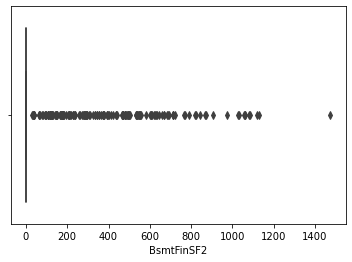

Remodld_Yes


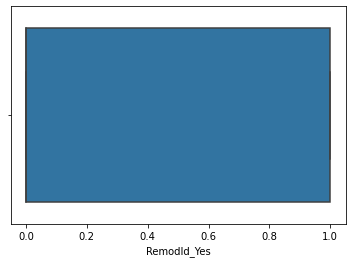

MasVnrArea


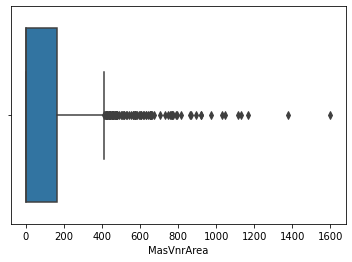

2ndFlrSF


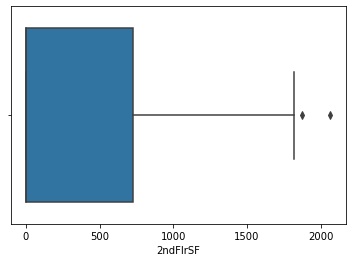

LotFrontage


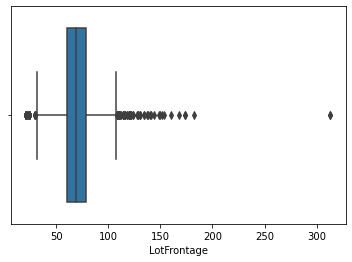

EnclosedPorch


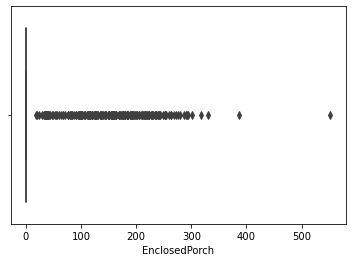

ageofhouse


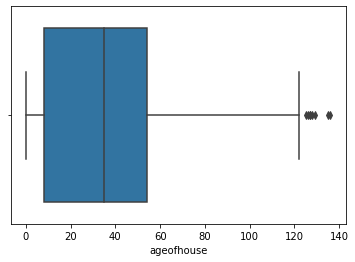

GrLivArea


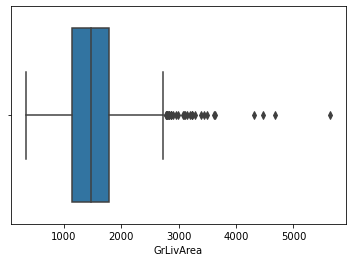

WoodDeckSF


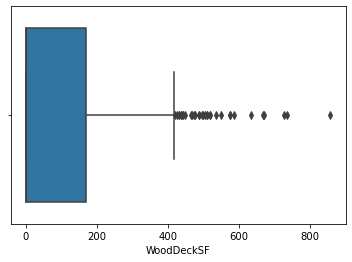

1stFlrSF


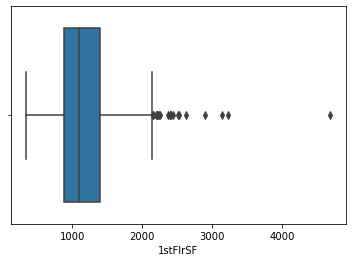

LotArea


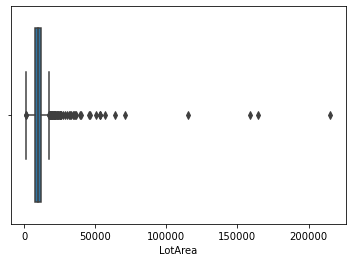

In [29]:
for i in lis2_num:
    sns.boxplot(train2[i])
    print(i)
    plt.show()

Some columns have outliers, and shall be treated accordingly, to avoid **extreme coefficients** in models or **large errors**

In [30]:
train2[lis2_num].describe([0.75,0.9, 0.95, 0.99]) #Checking data points with different percentile range.

,BsmtUnfSF,TotalBsmtSF,SalePrice,GarageArea,OpenPorchSF,ScreenPorch,BsmtFinSF1,BsmtFinSF2,Remodld_Yes,MasVnrArea,2ndFlrSF,LotFrontage,EnclosedPorch,ageofhouse,GrLivArea,WoodDeckSF,1stFlrSF,LotArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,567.240411,1057.429452,180921.195890,472.980137,46.660274,15.060959,443.639726,46.549315,0.476712,103.117123,346.992466,69.863699,21.954110,36.547945,1515.463699,94.244521,1162.626712,10516.828082
std,441.866955,438.705324,79442.502883,213.804841,66.256028,55.757415,456.098091,161.319273,0.499629,180.731373,436.528436,22.027677,61.119149,30.250152,525.480383,125.338794,386.587738,9981.264932
min,0.000000,0.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,334.000000,0.000000,334.000000,1300.000000
50%,477.500000,991.500000,163000.000000,480.000000,25.000000,0.000000,383.500000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,35.000000,1464.000000,0.000000,1087.000000,9478.500000
75%,808.000000,1298.250000,214000.000000,576.000000,68.000000,0.000000,712.250000,0.000000,1.000000,164.250000,728.000000,79.000000,0.000000,54.000000,1776.750000,168.000000,1391.250000,11601.500000
90%,1232.000000,1602.200000,278000.000000,757.100000,130.000000,0.000000,1065.500000,117.200000,1.000000,335.000000,954.200000,92.000000,112.000000,84.000000,2158.300000,262.000000,1680.000000,14381.700000
95%,1468.000000,1753.000000,326100.000000,850.100000,175.050000,160.000000,1274.000000,396.200000,1.000000,456.000000,1141.050000,104.000000,180.150000,91.000000,2466.100000,335.000000,1831.250000,17401.150000
99%,1797.050000,2155.050000,442567.010000,1002.790000,285.820000,268.050000,1572.410000,830.380000,1.000000,791.280000,1418.920000,137.410000,261.050000,110.410000,3123.480000,505.460000,2219.460000,37567.640000
max,2336.000000,6110.000000,755000.000000,1418.000000,547.000000,480.000000,5644.000000,1474.000000,1.000000,1600.000000,2065.000000,313.000000,552.000000,136.000000,5642.000000,857.000000,4692.000000,215245.000000


## Removing Outliers
### From above distribution, selecting 97% values as capping values for numerical columns

In [31]:
for i in lis2_num:
    ub = train2[i].quantile(0.97)
    train2[i]=np.where(train2[i]>ub,ub,train2[i])##capping to max value

### Plotting correlation matrix to see if predictor variable have any correlation between them

<AxesSubplot:>

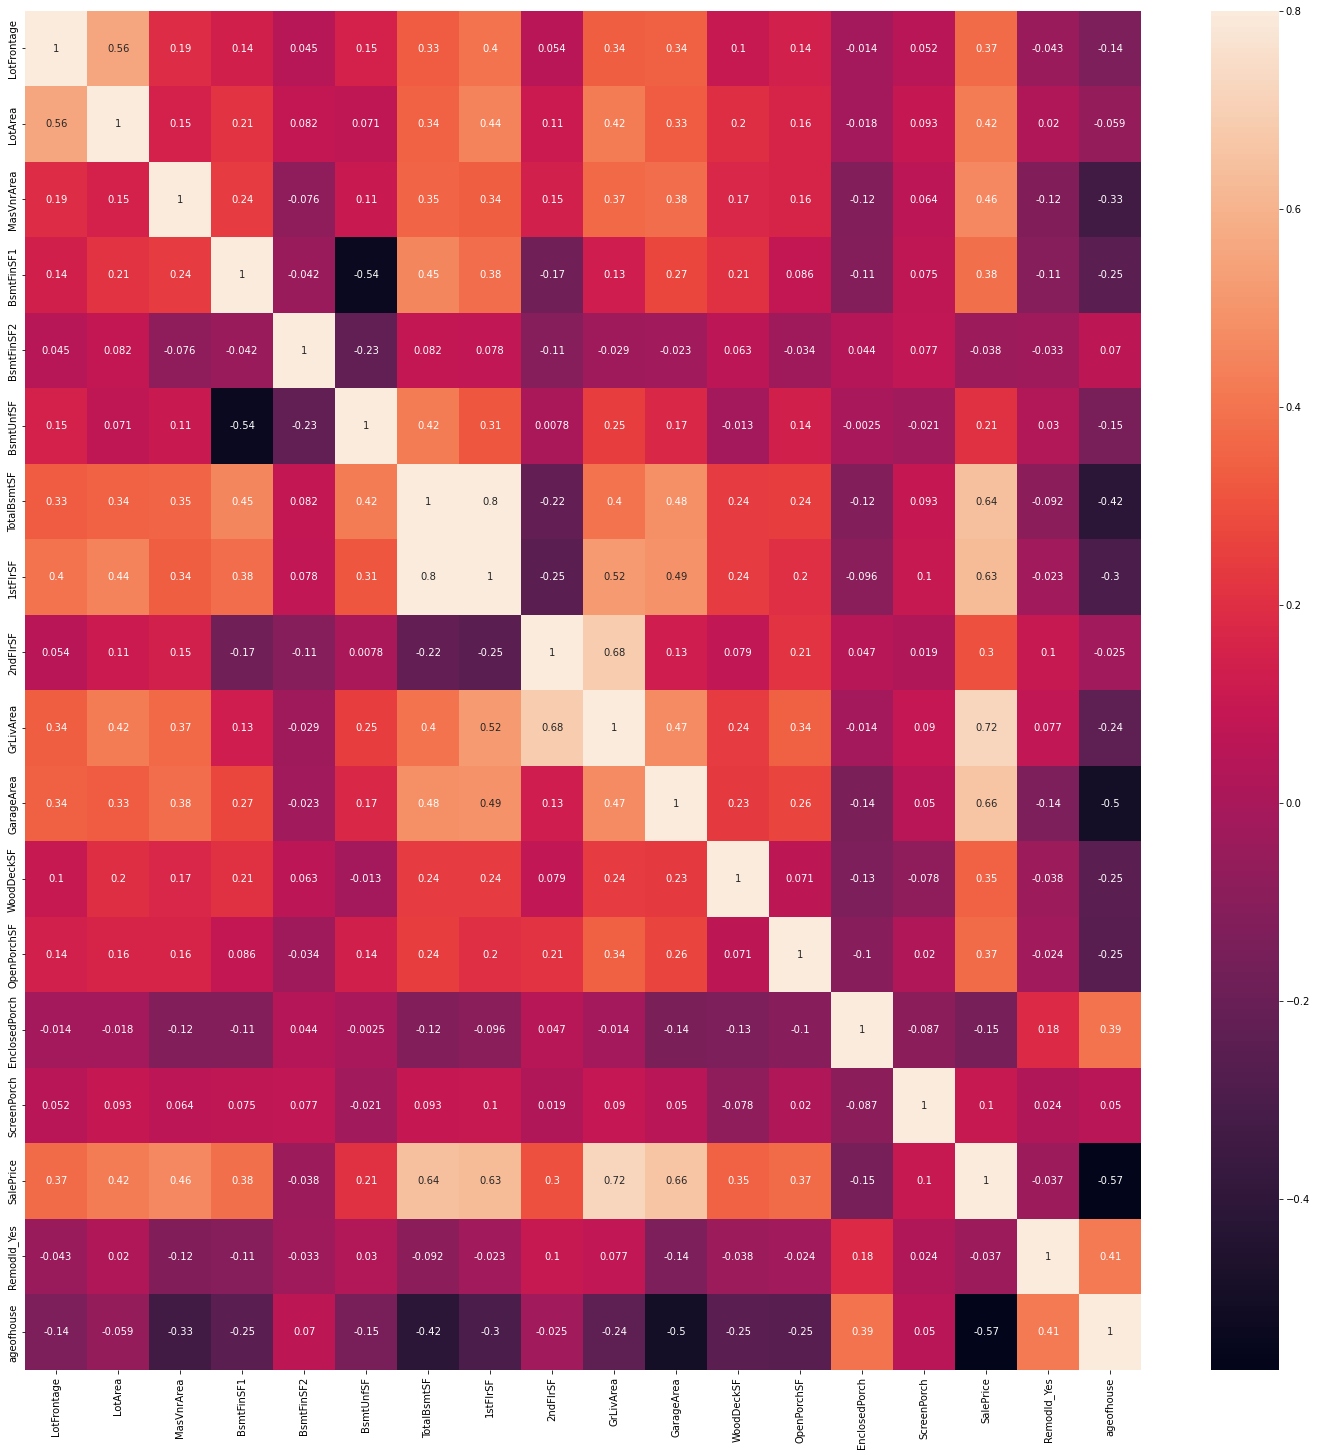

In [32]:
plt.figure(figsize = (25, 25))
sns.heatmap(train2.corr(),vmax = 0.8,annot=True)

## Dummy variable creation

#### Dummy variables for columns with entry "NotAvail"

In [33]:
#lis_cat_NotAvail column contains entries with "NotAvail". 
for i in lis_cat_NotAvail:
    ml = pd.get_dummies(train2[i], prefix = str(i)) #Creating dummy columns with specific prefix name
    ml1 = ml.drop([(str(i)+'_'+'NotAvail')], 1)     # Dropping "NotAvail" column
    train2 = pd.concat([train2,ml1], axis=1)        #Adding the results to the master dataframe

In [34]:
train2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
0,2-STORY 1946 & NEWER,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,1
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,1,0,0
2,2-STORY 1946 & NEWER,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,1,0
3,2-STORY 1945 & OLDER,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,0,0,0,0,0,0,0,0,1
4,2-STORY 1946 & NEWER,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,1,0,0,0,1,0,0,0


In [35]:
train2.shape #Check how many columns with dummy created

(1460, 123)

Seaparating categorical columns

In [36]:
df_cat = train2.select_dtypes(include='object')

In [37]:
df_cat1 = df_cat.drop(lis_cat_NotAvail, axis =1)

In [38]:
df_cat1.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,PavedDrive,MoSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Qty_1,Gd,Qty_8,Typ,NotAvail,Qty_2,Y,Feb,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Qty_1,TA,Qty_6,Typ,Qty_1,Qty_2,Y,May,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Qty_1,Gd,Qty_6,Typ,Qty_1,Qty_2,Y,Sep,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Qty_1,Gd,Qty_7,Typ,Qty_1,Qty_3,Y,Feb,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Qty_1,Gd,Qty_9,Typ,Qty_1,Qty_3,Y,Dec,WD,Normal


#### Dummy variables for remaining columns

In [39]:
df_cat_dummies = pd.get_dummies(df_cat1, drop_first = True)
train3 = train2.drop(df_cat1, axis = 1)
train4 = train3.drop(lis_cat_NotAvail, axis = 1)

In [40]:
df_cat_dummies.shape  #Check how many columns with dummy created

(1460, 242)

In [41]:
train5 = pd.concat([train4, df_cat_dummies], axis =1) #Adding the dummy results to the master dataframe

## Test-Train data split

In [42]:
from sklearn.model_selection import train_test_split #import liabrary 
train, test = train_test_split(train5, train_size=0.7, random_state=100)  #using 70-30 split ratio
print(train.shape, test.shape)

(1021, 312) (439, 312)


In [43]:
train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,90.0,9900.0,256.0,987.0,0.0,360.0,1347.0,1372.0,1245.53,2633.23,...,0,0,0,0,1,0,0,0,1,0
239,52.0,8741.0,0.0,94.0,0.0,641.0,735.0,798.0,689.00,1487.00,...,0,0,0,0,1,0,0,0,1,0
986,59.0,5310.0,0.0,0.0,0.0,485.0,485.0,1001.0,634.00,1635.00,...,0,0,0,0,1,0,0,0,1,0
1416,60.0,11340.0,0.0,0.0,0.0,777.0,777.0,1246.0,1044.00,2290.00,...,0,0,0,0,1,0,0,0,1,0
390,50.0,8405.0,0.0,241.0,391.0,229.0,861.0,961.0,406.00,1367.00,...,0,0,0,0,1,0,0,0,1,0


## Scaling numeric variables

In [44]:
from sklearn.preprocessing import MinMaxScaler #Importing liabraries
scaler = MinMaxScaler()                        #Instantiating 
num_lis = list(lis2_num)                       #Passing numerical columns for scaling

In [45]:
train[num_lis] = scaler.fit_transform(train[num_lis]) #Using fit transform method on train data
train[num_lis].describe()

,BsmtUnfSF,TotalBsmtSF,SalePrice,GarageArea,OpenPorchSF,ScreenPorch,BsmtFinSF1,BsmtFinSF2,Remodld_Yes,MasVnrArea,2ndFlrSF,LotFrontage,EnclosedPorch,ageofhouse,GrLivArea,WoodDeckSF,1stFlrSF,LotArea
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.351019,0.549852,0.423050,0.530298,0.210317,0.066254,0.318480,0.075489,0.479922,0.168680,0.271209,0.513001,0.100687,0.372891,0.484345,0.232205,0.488223,0.412281
std,0.272166,0.210633,0.207531,0.230151,0.269744,0.234408,0.306155,0.235606,0.499842,0.270016,0.337749,0.200136,0.262478,0.304830,0.214094,0.295030,0.222518,0.197576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.135902,0.416172,0.278785,0.373303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.419355,0.000000,0.082474,0.317507,0.000000,0.313119,0.297191
50%,0.290679,0.521659,0.371615,0.542986,0.121934,0.000000,0.284886,0.000000,0.000000,0.000000,0.000000,0.516129,0.000000,0.350515,0.468288,0.000000,0.443586,0.399506
75%,0.507116,0.689597,0.530752,0.651584,0.328284,0.000000,0.517446,0.000000,1.000000,0.275410,0.584490,0.612903,0.000000,0.556701,0.608592,0.435933,0.652332,0.499383
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.741935,0.419163,0.446234,0.717302,0.000000,0.226503,0.706916,0.621269,1.000000,1.000000,...,0,0,0,0,1,0,0,0,1,0
239,0.333333,0.361487,0.000000,0.068314,0.000000,0.403302,0.385734,0.264660,0.553178,0.477854,...,0,0,0,0,1,0,0,0,1,0
986,0.408602,0.190746,0.000000,0.000000,0.000000,0.305150,0.254532,0.390778,0.509020,0.545273,...,0,0,0,0,1,0,0,0,1,0
1416,0.419355,0.490823,0.000000,0.000000,0.000000,0.488870,0.407776,0.542989,0.838197,0.843647,...,0,0,0,0,1,0,0,0,1,0
390,0.311828,0.344766,0.000000,0.175147,0.715816,0.144081,0.451859,0.365927,0.325966,0.423190,...,0,0,0,0,1,0,0,0,1,0


In [47]:
y_train = train.pop('SalePrice') #Removing target variable from training data

In [48]:
X_train = train  #Assigning predictor variables to dedicated X_ column

## Model fitting

#### By Stats Model method

In [49]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

linreg = sm.OLS(y_train, X_train_lm).fit()

In [50]:
y_train_pred = linreg.predict(X_train_lm)
y_train_pred.head()

318     0.861995
239     0.269484
986     0.246900
1416    0.304940
390     0.233100
dtype: float64

Text(0.5, 0, 'Errors')

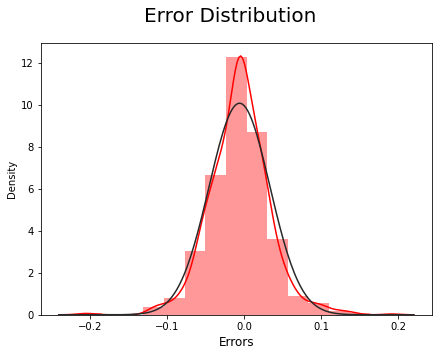

In [51]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (7,5))
from scipy.stats import norm
sns.distplot((y_train - y_train_pred),fit=norm, bins = 15, color = "r")
# Plot heading
fig.suptitle('Error Distribution', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 12) 

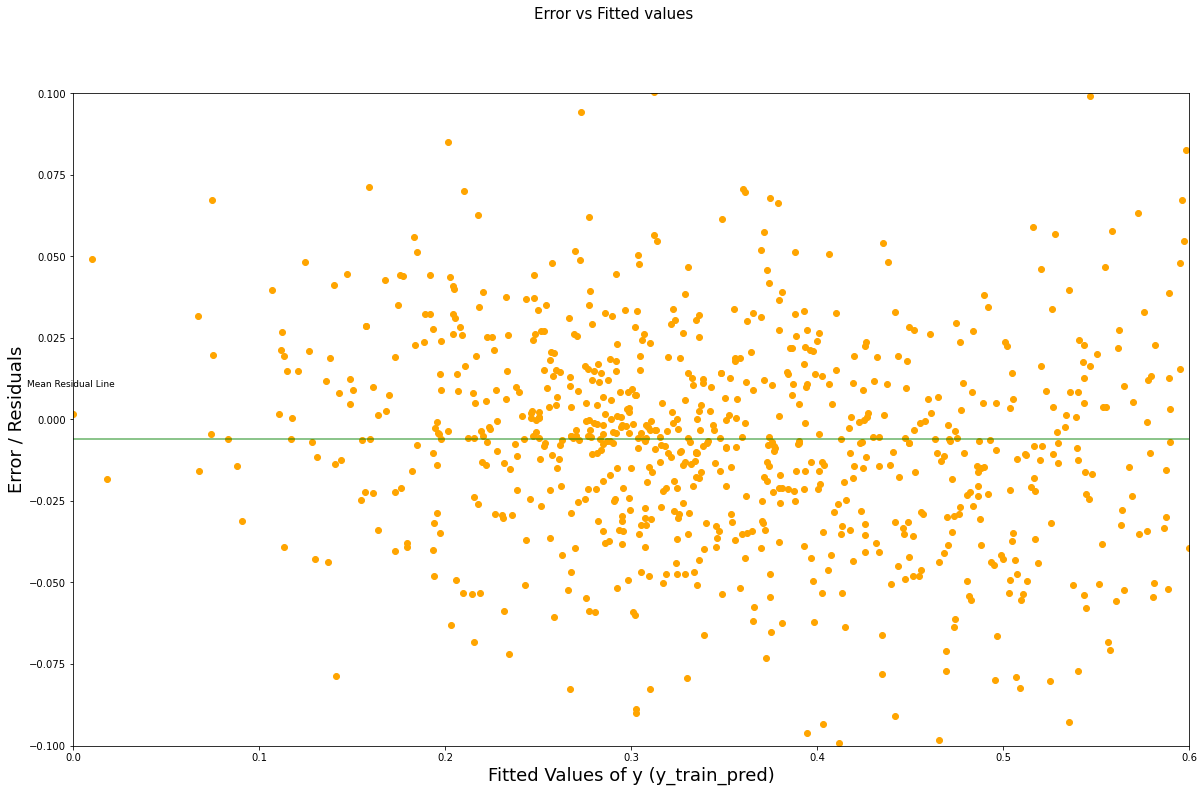

In [52]:
# Plotting Residuals and Fitted y values to understand the spread
fig = plt.figure(figsize = (20,12))
plt.scatter(y_train_pred, (y_train - y_train_pred),color='orange')
fig.suptitle('Error vs Fitted values', fontsize = 15) # Plot heading 
plt.xlabel('Fitted Values of y (y_train_pred)', fontsize = 18)  # X-label
plt.ylabel('Error / Residuals', fontsize = 18)  
plt.axhline(y=(y_train - y_train_pred).mean(), color='green', linestyle='-', alpha=0.6)
plt.text(-0.025,0.01, 'Mean Residual Line', fontsize = 9)
plt.ylim([-0.1, 0.1])
plt.xlim([0, 0.6])
ax = plt.subplot()
plt.show()

#### By SkLearn method

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
y_train_pred_sk = lm.predict(X_train) #predicting the values on train data

In [56]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred_sk) #checking r2 value on training data

0.9638378275137081

##### Checking other metrics to understand model fit

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
# Metrics to assess model performance
rss = np.sum(np.square(y_train - y_train_pred_sk))
print(rss)
mse = mean_squared_error(y_train, y_train_pred_sk)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

1.5886147358277454
0.0015559399959135605
0.039445405257311786


## Scaling test data

In [58]:
test[num_lis] = scaler.transform(test[num_lis]) #using only transormation while scaling
test[num_lis].describe([0.75, 0.9, 0.99]) #checking the scaled data

,BsmtUnfSF,TotalBsmtSF,SalePrice,GarageArea,OpenPorchSF,ScreenPorch,BsmtFinSF1,BsmtFinSF2,Remodld_Yes,MasVnrArea,2ndFlrSF,LotFrontage,EnclosedPorch,ageofhouse,GrLivArea,WoodDeckSF,1stFlrSF,LotArea
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.358292,0.546575,0.424187,0.533218,0.203770,0.069559,0.310640,0.062770,0.469248,0.167271,0.282040,0.524849,0.082690,0.373177,0.483742,0.244354,0.478939,0.417807
std,0.257758,0.195671,0.207732,0.235214,0.267450,0.237901,0.304626,0.207521,0.499623,0.260876,0.345787,0.191703,0.237889,0.297809,0.220683,0.299542,0.212523,0.198887
min,0.000000,0.000000,0.008841,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.047375,0.000000,-0.023608,-0.008808
50%,0.314588,0.515886,0.383403,0.531674,0.112555,0.000000,0.262357,0.000000,0.000000,0.000000,0.000000,0.516129,0.000000,0.360825,0.463733,0.000000,0.444828,0.393037
75%,0.509004,0.654960,0.525079,0.651584,0.307180,0.000000,0.513448,0.000000,1.000000,0.303300,0.595329,0.634409,0.000000,0.556701,0.618158,0.467071,0.602320,0.508739
90%,0.720281,0.826677,0.707571,0.885520,0.609670,0.000000,0.777767,0.214928,1.000000,0.555004,0.786011,0.754839,0.437037,0.845361,0.802012,0.668950,0.800691,0.664600
99%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
y_test = test.pop('SalePrice') #taking out target variable
X_test = test

In [60]:
y_test_pred_sk = lm.predict(X_test) #predicting the target variable in test data set
r2_score(y_test, y_test_pred_sk)

-4.349103862783261e+20

**R2 score on test data is not realistic. Hence Linear regression method seems not appropriate**

In [61]:
# Metrics to assess model performance
rss = np.sum(np.square(y_test - y_test_pred_sk))
print(rss)
mse = mean_squared_error(y_test, y_test_pred_sk)
print(mse)
rmse = mse**0.5
# Root Mean Squared Error
print(rmse)

8.220168044388921e+21
1.8724756365350617e+19
4327211153.312329


## With linear regression R2 score on test data is not realistic, this is clear sign of overfitting of data. Further we will use regularization techniques to reduce overfitting

##  Ridge method

In [62]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00005,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
params_iter2 = {'alpha': list(np.linspace(4,6,21))}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(model_cv.best_params_)

{'alpha': 4.0}


In [64]:
# Fitting Ridge model for alpha = 5.6 and printing coefficients which have been penalised
Ridge_Lambda = 4 #older parmeter with first iteration was 5
ridge = Ridge(alpha=Ridge_Lambda)

ridge.fit(X_train, y_train)

Ridge(alpha=4)

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_rdg = ridge.predict(X_train)
y_pred_test_rdg = ridge.predict(X_test)

In [66]:
r2_train_rdg = r2_score(y_train, y_pred_train_rdg) #0.893672 old R2
r2_train_rdg 

0.9479458535709819

In [67]:
r2_test_rdg = r2_score(y_test, y_pred_test_rdg) #0.8637204 old R2
r2_test_rdg

0.894578170053378

Text(0.5, 0, 'Errors')

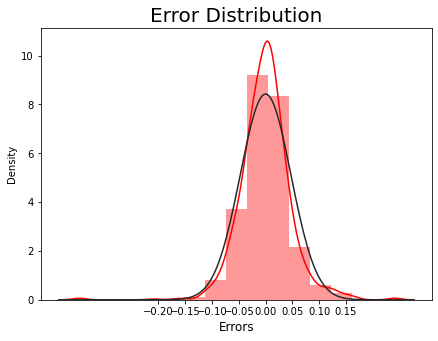

In [68]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (7,5))
sns.distplot((y_train - y_pred_train_rdg),fit=norm, bins = 15, color = "r")
# Plot heading
plt.title('Error Distribution', fontsize = 20)    
# Give the X-label
plt.xticks(np.arange(-0.2, 0.2, 0.05))
plt.xlabel('Errors', fontsize = 12) 

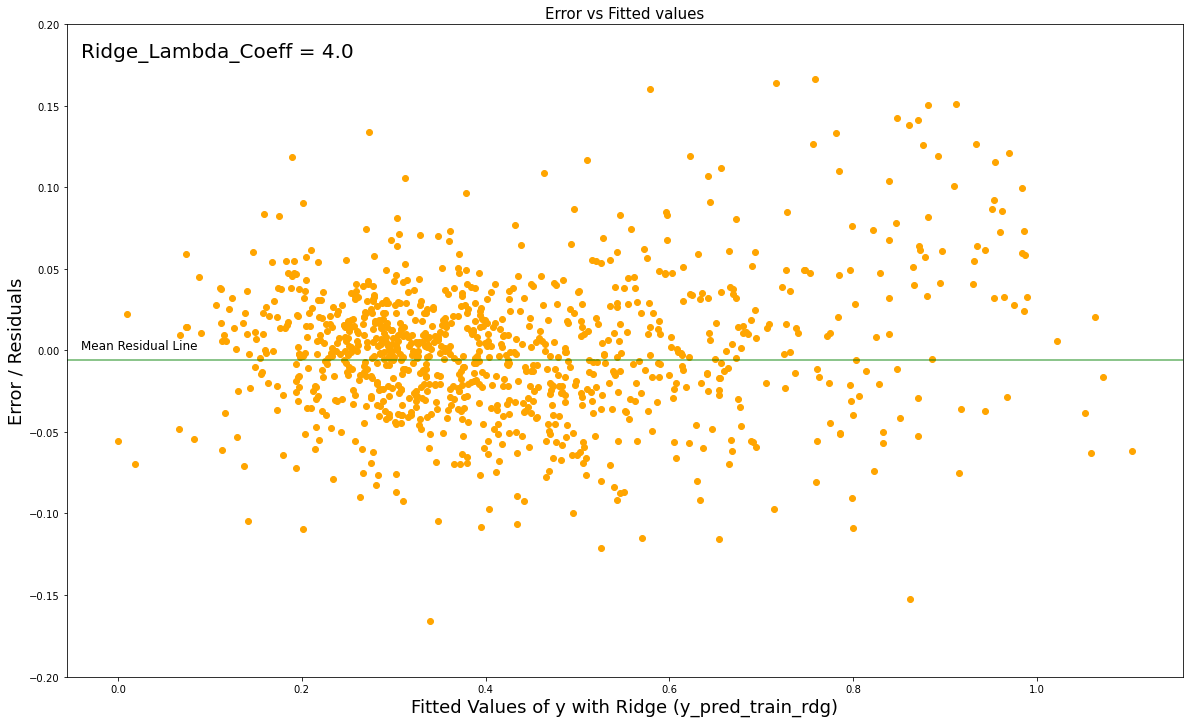

In [69]:
# Plotting Residuals and Fitted y values to understand the spread
fig = plt.figure(figsize = (20,12))
plt.scatter(y_train_pred, (y_train - y_pred_train_rdg),color='orange')
plt.title('Error vs Fitted values', fontsize = 15) # Plot heading 
plt.xlabel('Fitted Values of y with Ridge (y_pred_train_rdg)', fontsize = 18)  # X-label
plt.ylabel('Error / Residuals', fontsize = 18)  
plt.axhline(y=(y_train - y_train_pred).mean(), color='green', linestyle='-', alpha=0.6)
plt.text(-0.04,0.001, 'Mean Residual Line', fontsize = 12)
plt.ylim([-0.2, 0.2])
ax = plt.subplot()
plt.text(-0.04,0.18, 'Ridge_Lambda_Coeff = %0.1f' %(round(Ridge_Lambda,1)), fontsize = 20)
plt.show()

## Lasso Method

In [70]:
lasso = Lasso()

# cross validation
model_cv_lso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lso.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the best hyperparameter alpha
print(model_cv_lso.best_params_)

{'alpha': 0.0001}


In [72]:

Lasso_Lambda = 0.0001
lasso = Lasso(alpha=Lasso_Lambda)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lso = lasso.predict(X_train)
y_pred_test_lso = lasso.predict(X_test)

In [74]:
r2_train_lso = r2_score(y_train, y_pred_train_lso)
r2_train_lso

0.9520333829739829

In [75]:
r2_test_lso = r2_score(y_test, y_pred_test_lso)
r2_test_lso

0.8775047334606092

Text(0.5, 0, 'Errors')

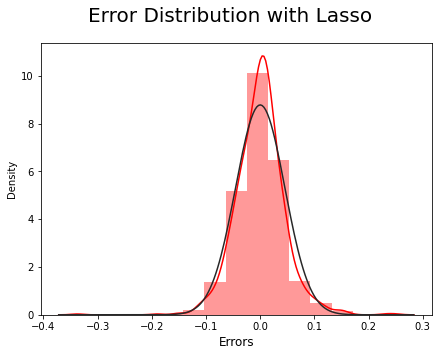

In [76]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (7,5))
sns.distplot((y_train - y_pred_train_lso),fit=norm, bins = 15, color = "r")
# Plot heading
fig.suptitle('Error Distribution with Lasso', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 12) 

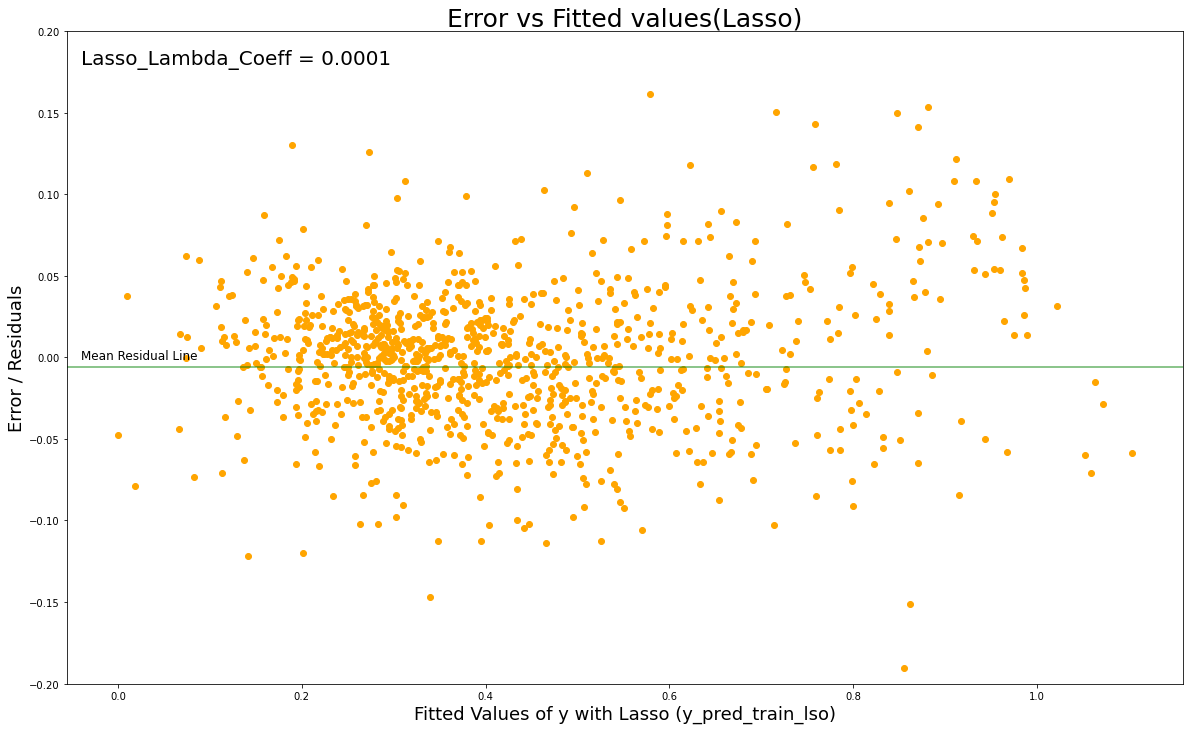

In [77]:
# Plotting Residuals and Fitted y values to understand the spread
fig = plt.figure(figsize = (20,12))
plt.scatter(y_train_pred, (y_train - y_pred_train_lso),color='orange')
plt.title('Error vs Fitted values(Lasso)', fontsize = 25) # Plot heading 
plt.xlabel('Fitted Values of y with Lasso (y_pred_train_lso)', fontsize = 18)  # X-label
plt.ylabel('Error / Residuals', fontsize = 18)  
plt.axhline(y=(y_train - y_train_pred).mean(), color='green', linestyle='-', alpha=0.6)
plt.text(-0.04,-0.001, 'Mean Residual Line', fontsize = 12)
plt.ylim([-0.2, 0.2])
ax = plt.subplot()
plt.text(-0.04,0.18, 'Lasso_Lambda_Coeff = %.4f' %(round(Lasso_Lambda,4)), fontsize = 20)
plt.show()

## Checking all coeff

In [78]:
df = pd.DataFrame(index=X_train.columns)

In [79]:
df.rows = X_train.columns

In [80]:
df['Linear'] = lm.coef_
df['Ridge'] = ridge.coef_
df['Lasso'] = lasso.coef_

In [81]:
pd.set_option('display.max_rows', None)
df.head(20)

,Linear,Ridge,Lasso
LotFrontage,4.109600e-03,0.004872,0.000000
LotArea,6.955430e-02,0.051076,0.061531
MasVnrArea,2.525952e-02,0.018390,0.017203
BsmtFinSF1,1.162550e-02,0.054649,0.051916
BsmtFinSF2,-7.355886e-03,0.010462,0.005791
BsmtUnfSF,-4.334080e-02,0.003661,-0.000000
TotalBsmtSF,1.383818e-01,0.074957,0.089798
1stFlrSF,4.991639e-02,0.103175,0.030698
2ndFlrSF,6.926828e-02,0.078729,0.047144
GrLivArea,3.027566e-01,0.151614,0.315087


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'GrLivArea'),
  Text(1, 0, 'OverallQual_Excellent'),
  Text(2, 0, '1stFlrSF'),
  Text(3, 0, 'Condition2_PosN'),
  Text(4, 0, '2ndFlrSF'),
  Text(5, 0, 'OverallQual_Very Good'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, 'OverallCond_Excellent'),
  Text(8, 0, 'BsmtFinSF1'),
  Text(9, 0, 'Neighborhood_Crawfor')])

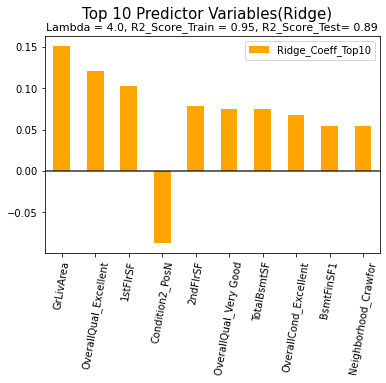

In [82]:
df2 = pd.DataFrame()
df2['Ridge_Coeff_Top10'] = df['Ridge'].sort_values(ascending= False, key = abs).head(10)
df2.plot(y='Ridge_Coeff_Top10', use_index=True, kind = 'bar', color = 'orange')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
plt.suptitle('Top 10 Predictor Variables(Ridge)\n', fontsize = 15) # Plot heading 
plt.title('Lambda = %.1f, R2_Score_Train = %.2f, R2_Score_Test= %.2f' %(round(Ridge_Lambda,1), round(r2_train_rdg,2), round(r2_test_rdg,2)), fontsize = 11)
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Condition2_PosN'),
  Text(1, 0, 'GrLivArea'),
  Text(2, 0, 'OverallQual_Excellent'),
  Text(3, 0, 'TotRmsAbvGrd_Qty_12'),
  Text(4, 0, 'OverallCond_Excellent'),
  Text(5, 0, 'ageofhouse'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, 'OverallQual_Very Good'),
  Text(8, 0, 'Fireplaces_Qty_3'),
  Text(9, 0, 'Neighborhood_Crawfor')])

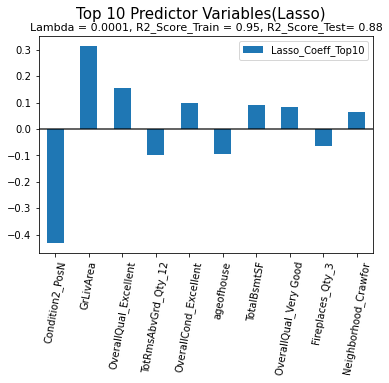

In [83]:
df1 = pd.DataFrame()
df1['Lasso_Coeff_Top10'] = df['Lasso'].sort_values(ascending= False, key = abs).head(10)
df1.plot(y='Lasso_Coeff_Top10', use_index=True, kind = 'bar')
plt.suptitle('Top 10 Predictor Variables(Lasso)', fontsize = 15) # Plot heading 
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
plt.title('Lambda = %.4f, R2_Score_Train = %.2f, R2_Score_Test= %.2f' %(round(Lasso_Lambda,4), round(r2_train_lso,2), round(r2_test_lso,2)), fontsize = 11)
plt.xticks(rotation=80)

In [84]:
list(df['Lasso'].sort_values(ascending= False, key = abs).head(5).index)

['Condition2_PosN',
 'GrLivArea',
 'OverallQual_Excellent',
 'TotRmsAbvGrd_Qty_12',
 'OverallCond_Excellent']

## Removing top 5 variables as per Lasso regression (Assignment Q.3)

In [85]:
#Reading the top 5 predictor variables from Lasso regression and removing from train & test data
X_train_5_Rmvd = X_train.drop(list(df['Lasso'].sort_values(ascending= False, key = abs).head(5).index), axis = True)
X_test_5_Rmvd = X_test.drop(list(df['Lasso'].sort_values(ascending= False, key = abs).head(5).index), axis = True)

In [86]:
model_cv_lso.fit(X_train_5_Rmvd, y_train) #fitting model with already existing Lasso object

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# Printing the best hyperparameter alpha
print(model_cv_lso.best_params_)

{'alpha': 0.0001}


In [88]:
# Fitting Ridge model for alpha = 5.6 and printing coefficients which have been penalised
Lasso_Lambda_5rmvd = 0.0001 #older parmeter with first iteration was 5
lasso_5rmvd = Lasso(alpha=Lasso_Lambda_5rmvd)

lasso_5rmvd.fit(X_train_5_Rmvd, y_train)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_lso_5rmvd = lasso_5rmvd.predict(X_train_5_Rmvd)
y_pred_test_lso_5rmvd = lasso_5rmvd.predict(X_test_5_Rmvd)

r2_train_lso_5rmvd = r2_score(y_train, y_pred_train_lso_5rmvd) #
print(r2_train_lso_5rmvd) 

r2_test_lso_5rmvd = r2_score(y_test, y_pred_test_lso_5rmvd) #
print(r2_test_lso_5rmvd)

0.9387713166029562
0.890066614034054


### Creating dataframe with modified regression, after removal of variables

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1stFlrSF'),
  Text(1, 0, 'Condition2_PosA'),
  Text(2, 0, '2ndFlrSF'),
  Text(3, 0, 'TotalBsmtSF'),
  Text(4, 0, 'OverallQual_Very Excellent')])

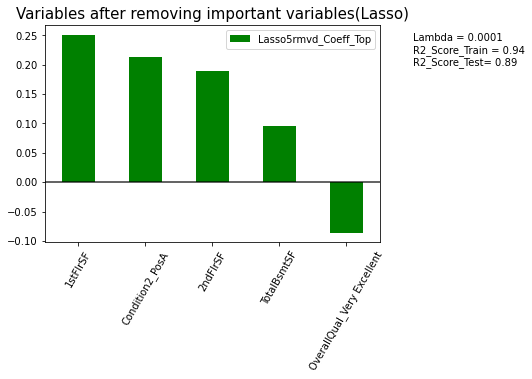

In [93]:
df3 = pd.DataFrame(index=X_train_5_Rmvd.columns)
df4 = pd.DataFrame()
df3['Lasso_5rmvd'] = lasso_5rmvd.coef_ #fetching variable coefficients
df4['Lasso5rmvd_Coeff_Top'] = df3['Lasso_5rmvd'].sort_values(ascending= False, key = abs).head(5)#fetching top5 variables 
#Barplot of 5 new predictor variables
df4.plot(y='Lasso5rmvd_Coeff_Top', use_index=True, kind = 'bar', color = 'green')
plt.title('Variables after removing important variables(Lasso)', fontsize = 15) # Plot heading 
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
plt.text(5,0.24, 'Lambda = %.4f' %(round(Lasso_Lambda_5rmvd,4)), fontsize = 10)
plt.text(5,0.22, 'R2_Score_Train = %.2f' %(round(r2_train_lso_5rmvd,2)), fontsize = 10)
plt.text(5,0.2, 'R2_Score_Test= %.2f' %(round(r2_test_lso_5rmvd,2)), fontsize = 10)
plt.xticks(rotation=60)